In [ ]:
### CHINCHILLA ###

import numpy as np

a, b, e, alpha, beta = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068] # C4
# a, b, e, alpha, beta = [6.007337896264272, 6.016157159698354, 0.5247285289349821, 0.34, 0.28] # MW

A = np.exp(a)
B = np.exp(b)
E = np.exp(e)
G = ((alpha*A)/(beta*B))**(1/(alpha+beta))

def optimal_N(C):
    a = (beta)/(alpha+beta)
    N_opt = G*(C/6)**a
    return N_opt

def N_to_C(N):
    a = (beta)/(alpha+beta)
    C = ((N/G) ** (1/a)) * 6
    return C
  
def optimal_D(C):
    b = (alpha)/(alpha+beta)
    D_opt = (1/G)*(C/6)**b
    return D_opt

def D_to_C(D):
    b = (alpha)/(alpha+beta)
    C = ((G*D) ** (1/b)) * 6
    return C

def loss_fn(N, D):
    L = E + A/(N**alpha) + B/(D**beta)
    return L

In [ ]:
### OUR FUNCTIONS ###

### Select one by uncommenting it & commenting the others ###

"""

func = r"$L(N,D,EP,NP)=E + \frac{A}{N^{\alpha * max(0, 1 - (NP/NP^*))}} + \frac{B}{(U + U \cdot EP^{*} \cdot (1-e^{-EP/EP^{*}}))^\beta}$"
# Samples: 202; Loss: 0.0277; Only learn EP* & NP*; a, b, e, alpha, beta, ep_star, np_star
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 4.6177821e+00, 9.0982532e+02]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, 0)
    unique_params = optimal_N(D_to_C(U))
    NP = np.maximum((N / unique_params) - 1, 0)
    a, b, e, alpha, beta, ep_star, n_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**(alpha * np.maximum(np.zeros_like(NP), 1 - (NP/n_star)))) + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L

# +++ Captures that parameters eventually hurt & but epochs not really (i.e. just do not help anymore)
# +++ Good Loss (0.0277)
# --- Will deviate from chinchilla for badly shaped models even if only 1 epoch by way too much

"""

"""

func = r"$L(N,D,EP,NP)=E + \frac{A}{N^{\alpha * max(0, 1 - (NP/NP^*))}} + \frac{B}{D^{\beta * max(0, 1 - (EP/EP^*))}}$"
# Samples: 202; Loss: 0.0414; Only learn EP* & NP*; a, b, e, alpha, beta, ep_star, np_star
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 9.2273184e+03, 7.9779913e+02]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, np.zeros_like(D))
    unique_params = optimal_N(D_to_C(U))
    NP = np.maximum((N / unique_params) - 1, np.zeros_like(N))
    a, b, e, alpha, beta, ep_star, n_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**(alpha * np.maximum(np.zeros_like(NP), 1 - (NP/n_star)))) + B / (D**(beta * np.maximum(np.zeros_like(EP), 1 - (EP/ep_star))))
    return L

# --- Will deviate from chinchilla for badly shaped models even if only 1 epoch by way too much
# --- Predicts that loss exactly follows CC until ~10 epochs, which is incorrect

"""

#"""

func = r"$L(N,D,EP,NP)=E + \frac{A}{(UN + UN * N^* * (1 - e^{(-1*NP/(N^*))}))^\alpha} + \frac{B}{(U + U * EP^* * (1 - e^{(-1*EP/(EP^*))}))^\beta}$"
# Samples: 202; Loss: 0.0231; Only learn EP* & N*; a, b, e, alpha, beta, ep_star, n_star
#params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 2.2477303e+00, 3.3332687e+02]
#params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 17, 8]
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 508.22855, 287.73526]#323.87842, 236.72693]
params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]

def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)

    ### No Log ###
    EP = np.maximum((D / U) - 1, 0)    
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    NP = np.maximum((N / UN ) - 1, 0)

    ### With Log ###
    #EP = np.log(D / U)
    #UN = np.minimum(N,optimal_N(D_to_C(U)))
    #NP = np.log(N / UN)

    L = E + A/(UN + UN*n_star*(1-np.exp(-1*NP/n_star)))**alpha + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L


#"""



"""

func = r"$L(N,D,EP,NP)=E + \frac{A}{N^{\alpha - \ln(NP)*NP^*))}} + \frac{B}{D^{\beta - \ln(EP)*EP^*))}}$"
# Samples: 202; Loss:
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, -0.01154289, 0.01978272]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U), 1)
    unique_params = optimal_N(D_to_C(U))
    NP = np.maximum((N / unique_params), 1)
    a, b, e, alpha, beta, ep_star, n_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**(alpha - np.log(NP)*n_star)) + B / (D**(beta - np.log(EP)*ep_star))
    return L

# --- Badly predicts allocation

"""

"""

func = r"$L(N,U,EP)=E + \frac{A}{N^\alpha} + \frac{B}{(U + U \cdot EP^{*} \cdot (1-e^{-EP/EP}))^\beta}$"

# Samples: 202; Loss: 0.0288; Only learn EP*; a, b, e, alpha, beta, ep_star
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 2.0877514] # Default

# Samples: 156; Loss: 0.0148; Only learn EP*; a, b, e, alpha, beta, ep_star
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 4.7843914] # With removing outliers

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, 0)
    a, b, e, alpha, beta, ep_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**alpha) + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L


# --- Plateaus too quickly, i.e. EP* must be a bit higher (This can be achieved by removing some outliers from the fitting)
# +++ With EP* a bit higher (e.g. 4.7 instead of 2.0877514) fits all dots very nicely i.e. corresponds very well to chinchilla in the near-optimal region
# --- Incorrectly predicts that we should allocate more to params; The data suggests more to epochs

"""


"""
func = r"$L(N,D,EP)=E + \frac{A}{N^\alpha} + \frac{B}{(D)^{\beta * max(0, 1 - (EP/EP^*))}}$"
# Samples: 202; Loss: 0.0485; Only learn EP*; a, b, e, alpha, beta, ep_star
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 8.8647822e+03]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, 0)
    a, b, e, alpha, beta, ep_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**alpha) + B / (D**(beta * np.maximum(np.zeros_like(EP), 1 - (EP/ep_star))))
    return L

# --- Predicts that loss exactly follows CC until ~10 epochs, which is incorrect; Increases too quickly afterwards

"""

"""
func = r"$L(N,D,EP)=E + \frac{A}{N^\alpha} + \frac{B}{(D)^{\beta - EP^* * \ln(EP))}}$"
# Samples: 202; Loss: 0.0262; Only learn EP*; a, b, e, alpha, beta, ep_star
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 0.0081868]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U)-1, 0)
    a, b, e, alpha, beta, ep_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**alpha) + B / (D**(beta - ep_star * np.log((EP)+1)))
    # L = E + A/(N**alpha) + B / (D**(beta - ep_star * np.log((EP*0.1)+1))) # Looks a bit better
    return L

--- Badly predicts 8.7B in its default setting

"""

"""
func = r"$L(N,D,EP)=E + \frac{A}{N^{\alpha - NP^* * \ln(NP)}} + \frac{B}{D^{\beta - EP^* * \ln(EP)}}$"
# Samples: 202; Loss: 0.0262; Only learn EP*; a, b, e, alpha, beta, ep_star
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 0.00997364, -0.00698706]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U)-1, 0)
    a, b, e, alpha, beta, ep_star, nstar = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**(alpha - nstar * np.log(EP+1))) + B / (D**(beta - ep_star * np.log(EP+1)))
    return L

--- Badly predicts 8.7B
"""


"""
func = r"$L(N,D,EP)=E+\frac{A}{N^\alpha} + \frac{B*EP^\gamma}{D^\beta}$"
# Samples: 202; Loss: 0.0264; a, b, e, alpha, beta, gamma
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 0.19767745]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U), 1)
    a, b, e, alpha, beta, gamma = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    return E + A/(N**alpha) + (B*EP**gamma)/(D**beta)

# +++ Best loss
# --- No diminishing returns (Loss line goes straight down; not curved / smooth

"""




"""

func = r"$L(N,D,EP,NP)=E + \frac{A}{N^{\alpha - N^* * \ln(NP)}} + \frac{B}{(U + U \cdot EP^{*} \cdot (1-e^{-EP/EP^{*}}))^\beta}$"
# Samples: 202; Loss: 0.0239; Only learn EP* & NP*; a, b, e, alpha, beta, ep_star, n_star
params = [6.0073380e+00, 6.0161572e+00, 5.2472854e-01, 3.4000000e-01, 2.8000000e-01, 5, 0.02]

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, 0)
    unique_params = optimal_N(D_to_C(U))
    NP = np.maximum((N / unique_params) - 1, 0)
    a, b, e, alpha, beta, ep_star, n_star = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    L = E + A/(N**(alpha - n_star * np.log(EP+1))) + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L


"""

### Geom. Series via delta ###
params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 0.038892232, 0.25062278]
func = r"$L(N,D,EP,NP)=E + \frac{A}{(UN * TODO )^\alpha} + \frac{B}{(U * TODO)^\beta}$"
def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    UN = np.minimum(N, optimal_N(D_to_C(U)))
    EP = D/U
    NP = N/UN
    L = E + A/(UN * (1-((1-n_star)**NP))/n_star)**alpha + B / (U * (1-((1-ep_star)**EP))/ep_star)**beta
    return L


### Exp decay ###
params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 0.039664857, 0.28835988]
func = r"$L(N,D,EP,NP)=E + \frac{A}{(UN * TODO)^\alpha} + \frac{B}{(U * TODO)^\beta}$"
def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    UN = np.minimum(N, optimal_N(D_to_C(U)))
    EP = np.maximum((D/U)-1, 0)
    NP = np.maximum((N/UN)-1, 0)
    #L = E + A/(UN * (1-((1-n_star)**NP))/n_star)**alpha + B / (U * (1-((1-ep_star)**EP))/ep_star)**beta
    L = E + A/(UN * (1-np.exp(-1*n_star*NP-n_star))/(1-np.exp(-1*n_star)) )**alpha + B / (U * (1-np.exp(-1*ep_star*EP-ep_star))/(1-np.exp(-1*ep_star)) )**beta
    return L



Try the following function:

$$L(N,U_D,e_D)=E + \frac{A}{U_N^\alpha \cdot (1+e_N)^{\alpha(1-\sigma(\gamma_N(e_N-e^*_N))}} + \frac{B}{U_D^\beta \cdot (1+e_D)^{\beta(1-\sigma(\gamma_D(e_D-e^*_D))}}$$

Where $U_D$ = unique tokens, $D = U_D(1+e_D)$ (so $e_D$ is fractional repetitions or epochs - 1) and similarly $U_N$ = unique parameters (minimum/optimum to fit $U_D$_ and $N = U_N(1+e_N)$). $e^*_D,\alpha_D,e^*_N,\alpha_N$ are learned paramters and $\sigma$ is some activation function such that $\sigma(-\infty)=0,\sigma(+\infty)=1$ (e.g. sigmoid). 

__Version II__ 

Instead of $e_D = D/U_D - 1$ write $e_D = \log D/U_D = \log D - \log U_D$ (note it's the same if $e_D$ is small) and similarly $e_N = \log N - \log U_N$

So now $EP = e^{e_D}$ so original chinchilla would have the term $U_D^\beta e^{\beta e_D}$ in the denominator. We put the $e_D$ inside some activation function $\sigma$ s.t. $\sigma(0)=0,\sigma(1)=1$ and $\sigma'(0)=1$ (e.g. $\tanh$ would do) and so replace $e^{\beta e_d}$ with $e^{\beta \tanh(e_d/e^*_d)}$ for some learned parameter

$$L(N,U_D,e_D)=E + \frac{A}{U_N^\alpha \cdot e^{\alpha \tanh(e_N/e^*_N)}} + \frac{B}{U_D^\beta \cdot  e^{\beta \tanh(e_D/e^*_D)}}$$


In [ ]:
"""

#"""

func = r"$L(N,U,EP)=E + \frac{A}{(U_N^\alpha \cdot (1+E_N)^{\alpha (1-\sigma(E_N/E^*_N))} + U_N \cdot NP^* (1-e^{-{-NP/NP^*}}))^\alpha} + \frac{B}{(U + U \cdot EP^{*} \cdot (1-e^{-EP/EP^*}))^\beta}$"

# Samples: 156; Loss: 0.0148; Only learn EP*, NP*; a, b, e, alpha, beta, ep_star, n_star 
params = [6.007338, 6.016157, 0.52472854, 0.34, 0.28, 4.7843914, 9.0982532e+02] # With removing outliers

def scaling_law(N, D, U, params):
    EP = np.maximum((D / U) - 1, 0)
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    NP = np.maximum((N / UN ) - 1, 0)
    L = E + A/(UN + UN*n_star*(1-np.exp(-1*NP/n_star)))**alpha + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L


# --- Plateaus too quickly, i.e. EP* must be a bit higher (This can be achieved by removing some outliers from the fitting)
# +++ With EP* a bit higher (e.g. 4.7 instead of 2.0877514) fits all dots very nicely i.e. corresponds very well to chinchilla in the near-optimal region
# --- Incorrectly predicts that we should allocate more to params; The data suggests more to epochs

#"""


Text(0, 0.5, 'Validation Loss')

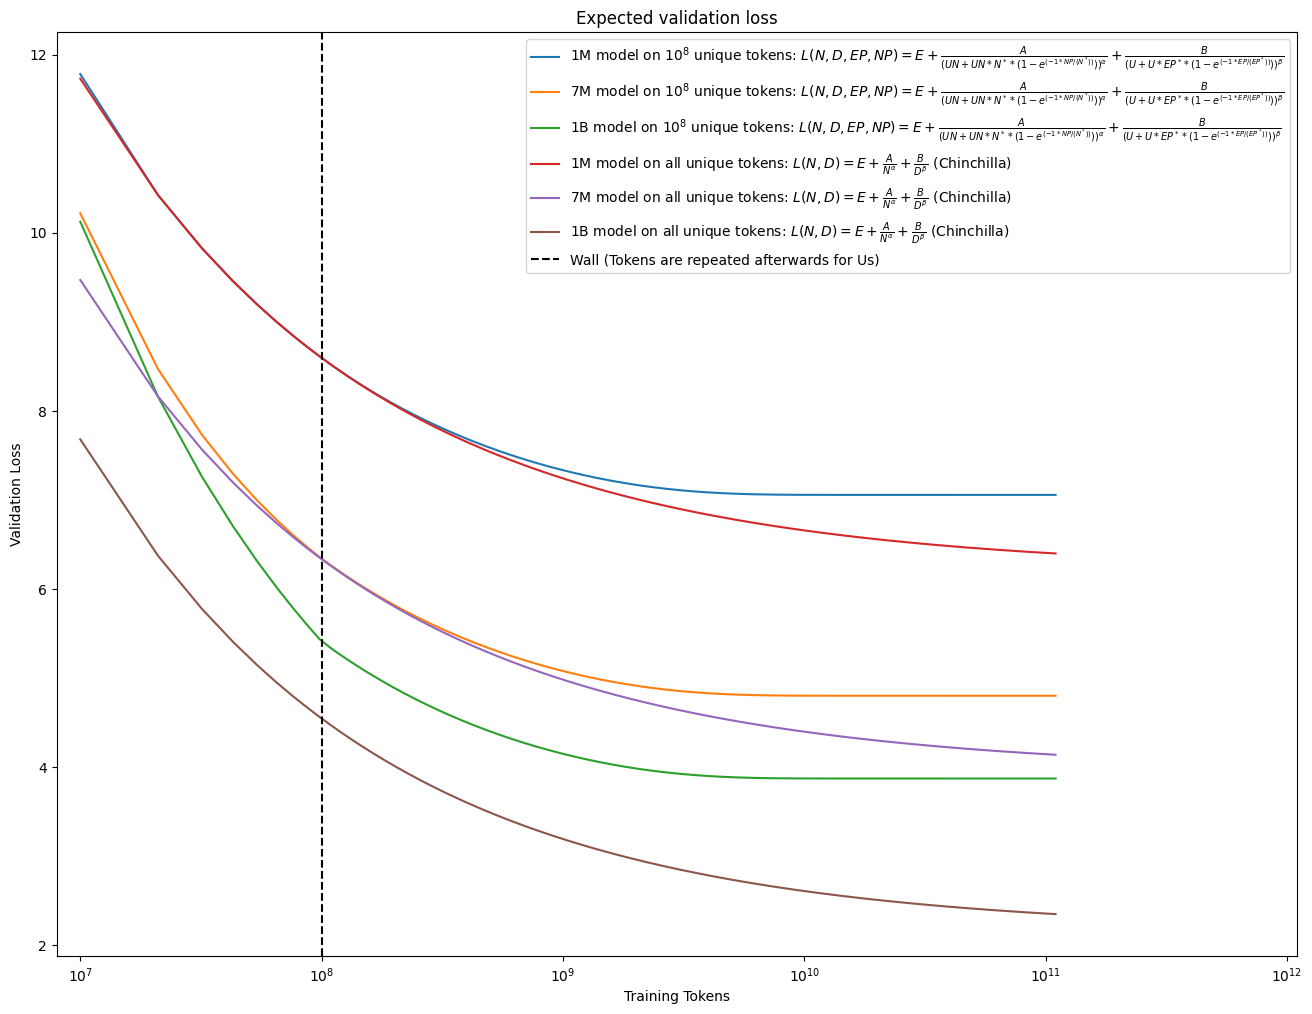

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(100e5, 110e9, 10000)

unique_toks = 100e6

plt.figure(figsize=(16, 12))

plt.plot(np.log10(x), [scaling_law(1e6, i, min(i, unique_toks), params) for i in x], label=r"1M model on $10^8$ unique tokens: " + func)
plt.plot(np.log10(x), [scaling_law(7e6, i, min(i, unique_toks), params) for i in x], label=r"7M model on $10^8$ unique tokens: " + func)
plt.plot(np.log10(x), [scaling_law(1e9, i, min(i, unique_toks), params) for i in x], label=r"1B model on $10^8$ unique tokens: " + func)
#plt.plot(np.log10(x), [scaling_law(100e9, min(i, unique_toks), max(i/unique_toks, 1), params) for i in x], label=r"100B model on $10^8$ unique tokens: $L(N,U,EP)=E + \frac{A}{N^\alpha} + \frac{B}{(U \cdot EP^{*} \cdot (1-e^{-EP/EP}))^\beta}$ (Us)")

plt.plot(np.log10(x), [loss_fn(1e6, i) for i in x], label=r"1M model on all unique tokens: $L(N,D)=E + \frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)")
plt.plot(np.log10(x), [loss_fn(7e6, i) for i in x], label=r"7M model on all unique tokens: $L(N,D)=E + \frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)")
plt.plot(np.log10(x), [loss_fn(1e9, i) for i in x], label=r"1B model on all unique tokens: $L(N,D)=E + \frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)")
#plt.plot(np.log10(x), [scaling_law(100e9, i, params) for i in x], label=r"100B model on all unique tokens: $L(N,D)=E + \frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)")

x_ticks = [100e5, 100e6, 100e7, 100e8, 100e9, 100e10]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, ["$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$"])
plt.xlim(np.log10(80e5), np.log10(110e10))

plt.axvline(x=np.log10(unique_toks), color='black', linestyle="--", label='Wall (Tokens are repeated afterwards for Us)')

plt.legend()
plt.title("Expected validation loss")
plt.xlabel("Training Tokens")
plt.ylabel("Validation Loss")



Loss is not improving


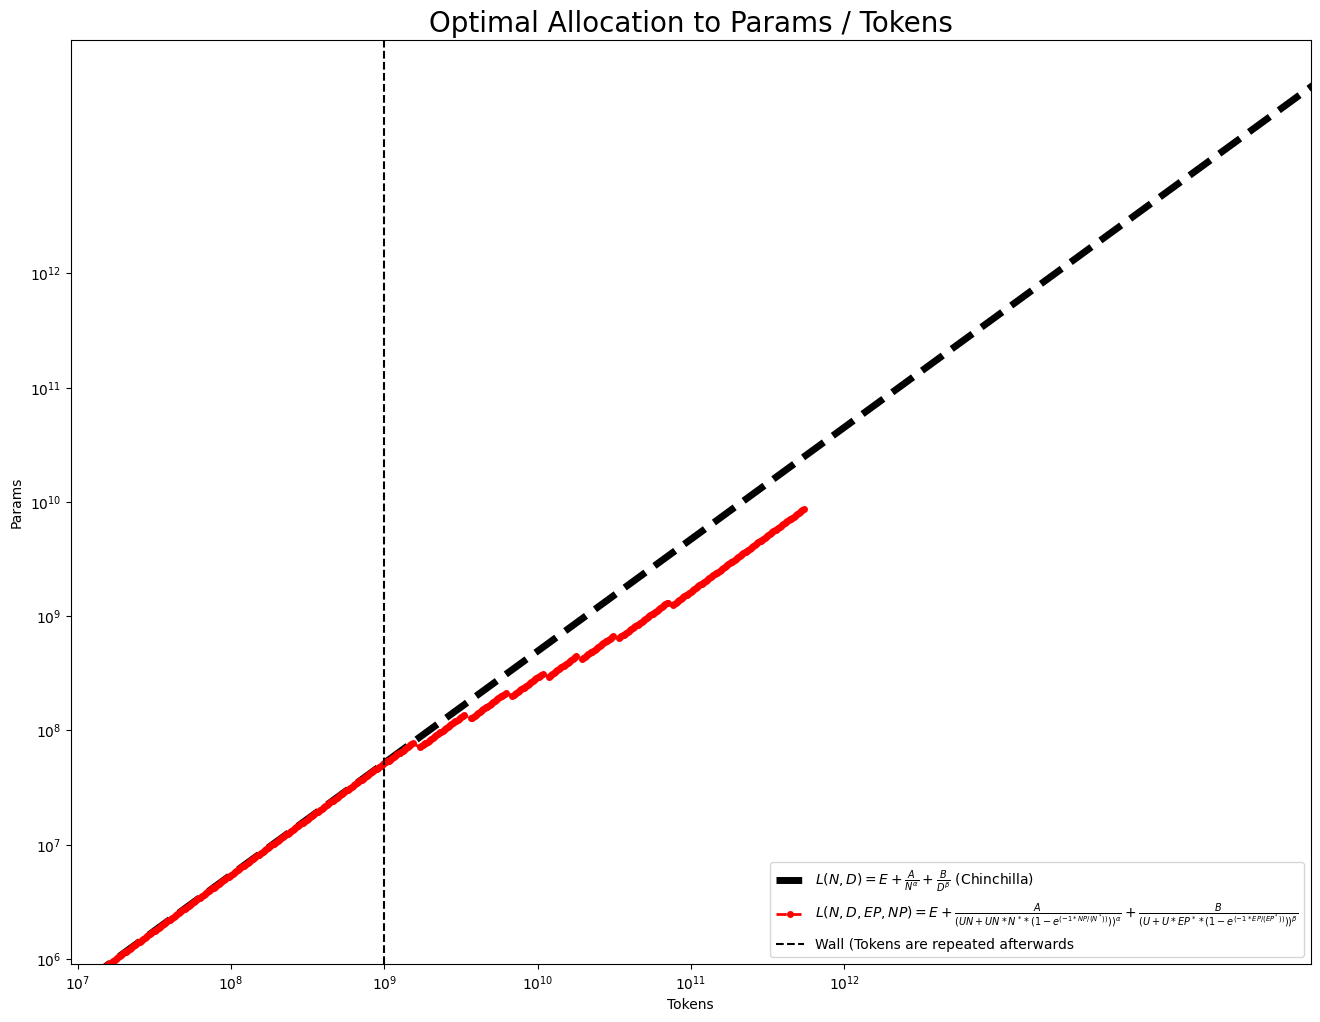

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


es = np.linspace(1, 10000, 1000)
ps = np.linspace(1e6, 10e9, 1000)


MIN_PARAMS, MAX_PARAMS = 90e4, 110e12
MIN_TOKS, MAX_TOKS = 90e5, 110e13

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 1000)
toks_c4 = np.log10(np.array([optimal_D(x) for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x) for x in c_c4]))

fig, ax = plt.subplots(figsize=(16, 12))
    
x_ticks = [100e3, 100e4, 100e5, 100e6, 100e7, 100e8, 100e9, 100e10]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, ["$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$"])
plt.xlim(np.log10(MIN_TOKS), np.log10(MAX_TOKS))

y_ticks = [100e3, 100e4, 100e5, 100e6, 100e7, 100e8, 100e9, 100e10]
y_ticks_loc = [np.log10(x) for x in y_ticks]
plt.yticks(y_ticks_loc, ["$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$"])
plt.ylim(np.log10(MIN_PARAMS), np.log10(MAX_PARAMS))


plt.plot(toks_c4, size_c4, label=r"$L(N,D)=E+\frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)", color="black", linestyle="--", linewidth=5.0)


unique_toks = 100e7
# If not using cc before wall, there will be a vertical line upwards to match CC right before hitting 1 epoch
use_cc_before_wall = False

toks_me = []
size_me = []

last_l = float("inf")

for t, s in zip(toks_c4, size_c4):
    t = 10 ** t
    s = 10 ** s

    if (use_cc_before_wall) and (t < unique_toks):
        toks_me.append(t)
        size_me.append(s)
        continue
  
    min_l, min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s
      
    for i in np.linspace(1.01, 100, 1000):
        D =  t*i
        U = min(unique_toks, D)
        N = s/i

        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N

        D =  t/i
        U = min(unique_toks, D)
        N = s*i
        
        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_me.append(min_t)
    size_me.append(min_s)

    last_l = min_l


plt.plot(
    np.log10(toks_me), 
    np.log10(size_me), 
    label=func, 
    color="red", 
    linestyle="--", 
    linewidth=2.0,
    marker=".",
    markersize=8,
)

plt.axvline(x=np.log10(unique_toks), color='black', linestyle="--", label='Wall (Tokens are repeated afterwards')

ax.set_xlabel('Tokens')
ax.set_ylabel('Params')
#ax.set_title('IsoLoss Contours for 100M unique tokens')

plt.legend()


plt.title("Optimal Allocation to Params / Tokens", fontsize=20)


plt.show()

Loss is not improving


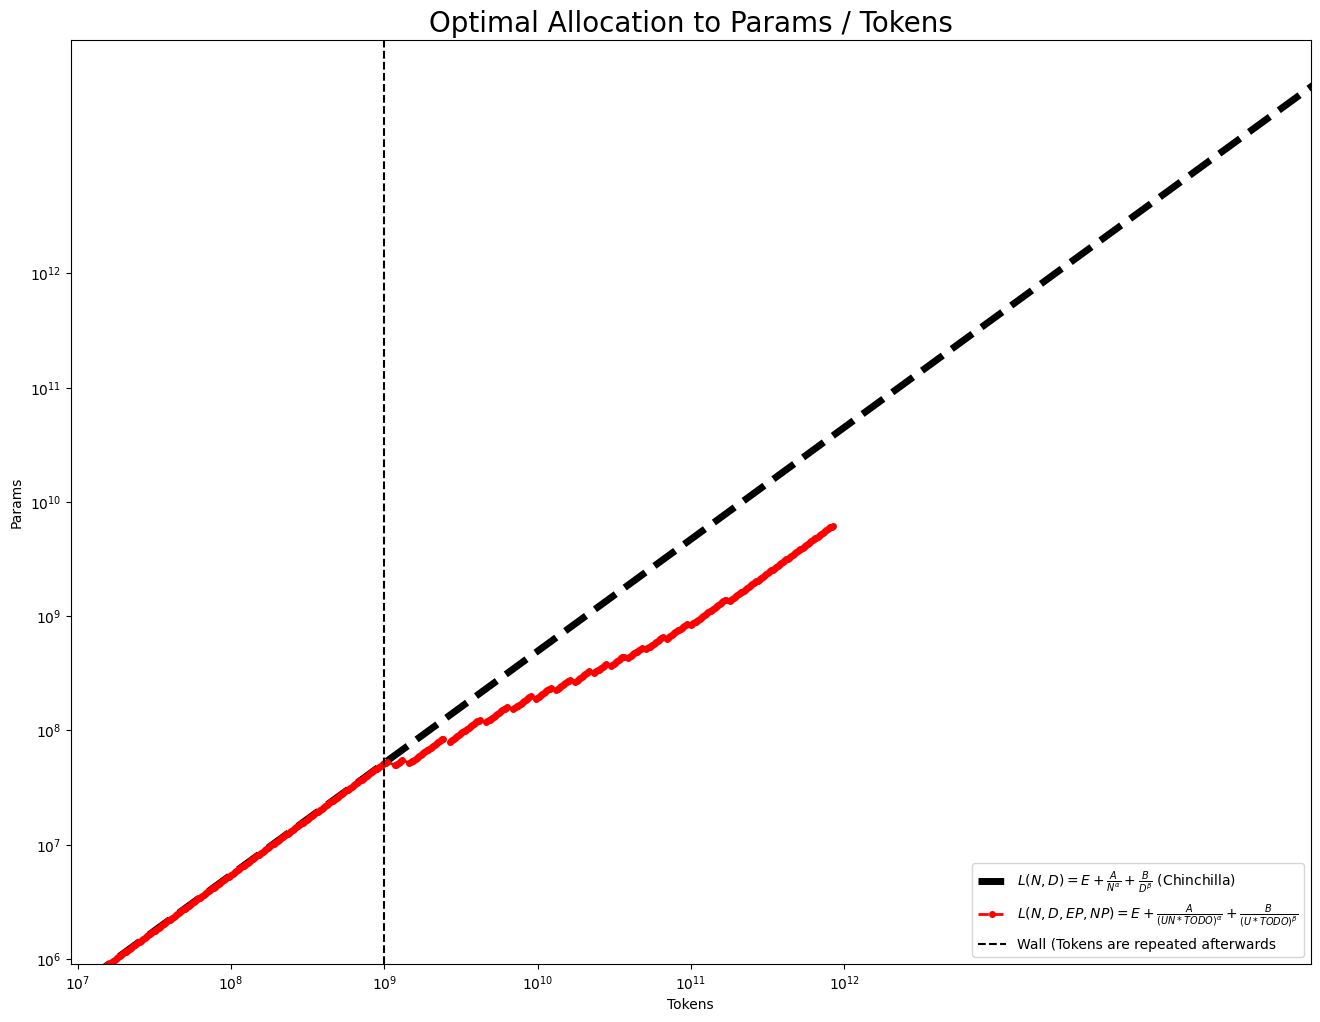

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


es = np.linspace(1, 10000, 1000)
ps = np.linspace(1e6, 10e9, 1000)


MIN_PARAMS, MAX_PARAMS = 90e4, 110e12
MIN_TOKS, MAX_TOKS = 90e5, 110e13

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 1000)
toks_c4 = np.log10(np.array([optimal_D(x) for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x) for x in c_c4]))

fig, ax = plt.subplots(figsize=(16, 12))
    
x_ticks = [100e3, 100e4, 100e5, 100e6, 100e7, 100e8, 100e9, 100e10]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, ["$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$"])
plt.xlim(np.log10(MIN_TOKS), np.log10(MAX_TOKS))

y_ticks = [100e3, 100e4, 100e5, 100e6, 100e7, 100e8, 100e9, 100e10]
y_ticks_loc = [np.log10(x) for x in y_ticks]
plt.yticks(y_ticks_loc, ["$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$"])
plt.ylim(np.log10(MIN_PARAMS), np.log10(MAX_PARAMS))


plt.plot(toks_c4, size_c4, label=r"$L(N,D)=E+\frac{A}{N^\alpha} + \frac{B}{D^\beta}$ (Chinchilla)", color="black", linestyle="--", linewidth=5.0)


unique_toks = 100e7
# If not using cc before wall, there will be a vertical line upwards to match CC right before hitting 1 epoch
use_cc_before_wall = False

toks_me = []
size_me = []

last_l = float("inf")

for t, s in zip(toks_c4, size_c4):
    t = 10 ** t
    s = 10 ** s

    if (use_cc_before_wall) and (t < unique_toks):
        toks_me.append(t)
        size_me.append(s)
        continue
  
    min_l, min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s
      
    for i in np.linspace(1.01, 100, 1000):
        D =  t*i
        U = min(unique_toks, D)
        N = s/i

        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N

        D =  t/i
        U = min(unique_toks, D)
        N = s*i
        
        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_me.append(min_t)
    size_me.append(min_s)

    last_l = min_l


plt.plot(
    np.log10(toks_me), 
    np.log10(size_me), 
    label=func, 
    color="red", 
    linestyle="--", 
    linewidth=2.0,
    marker=".",
    markersize=8,
)

plt.axvline(x=np.log10(unique_toks), color='black', linestyle="--", label='Wall (Tokens are repeated afterwards')

ax.set_xlabel('Tokens')
ax.set_ylabel('Params')
#ax.set_title('IsoLoss Contours for 100M unique tokens')

plt.legend()


plt.title("Optimal Allocation to Params / Tokens", fontsize=20)


plt.show()

Chinchilla Toks, Size, Ratio:  11932481.542485822 678819.4032531969 0.05688836817691675
Us Toks, Size, Ratio:  11932481.542485822 678819.4032531969 0.05688836817691675
Chinchilla Toks, Size, Ratio:  12159362.880817395 691456.2238495332 0.056866155786860696
Us Toks, Size, Ratio:  12159362.880817395 691456.2238495332 0.056866155786860696
Chinchilla Toks, Size, Ratio:  12390558.086427946 704328.2899824862 0.05684395206975991
Us Toks, Size, Ratio:  12390558.086427946 704328.289982486 0.056843952069759895
Chinchilla Toks, Size, Ratio:  12626149.182153918 717439.9809547509 0.05682175702222786
Us Toks, Size, Ratio:  12626149.182153918 717439.9809547509 0.05682175702222786
Chinchilla Toks, Size, Ratio:  12866219.750394193 730795.7575935966 0.056799570640879704
Us Toks, Size, Ratio:  12866219.750394193 730795.7575935966 0.056799570640879704
Chinchilla Toks, Size, Ratio:  13110854.962763418 744400.1637685192 0.056777392922331554
Us Toks, Size, Ratio:  13110854.962763418 744400.1637685191 0.05677

Text(0.5, 1.0, 'Optimal Allocation to EP vs NP')

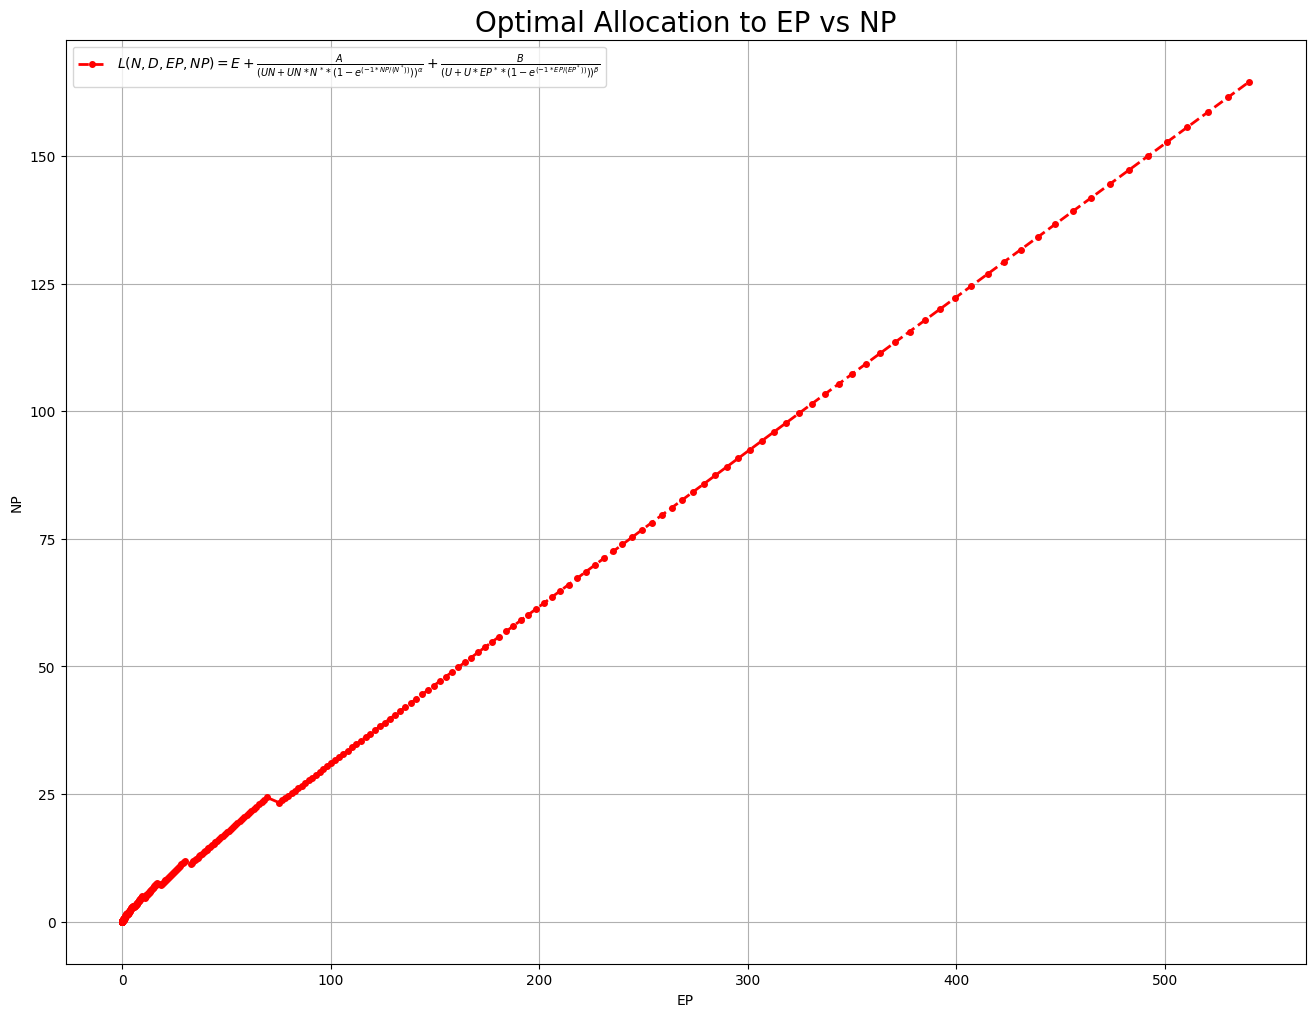

In [ ]:

fig, ax = plt.subplots(figsize=(16, 12))


params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]

def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)

    ### No Log ###
    EP = np.maximum((D / U) - 1, 0)    
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    NP = np.maximum((N / UN ) - 1, 0)

    ### With Log ###
    #EP = np.log(D / U)
    #UN = np.minimum(N,optimal_N(D_to_C(U)))
    #NP = np.log(N / UN)

    L = E + A/(UN + UN*n_star*(1-np.exp(-1*NP/n_star)))**alpha + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    
    nterm = (UN + UN*n_star*(1-np.exp(-1*NP/n_star)))
    dterm = (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))
    
    
    return L, EP, NP, dterm, nterm


toks_me = []
size_me = []

last_l = float("inf")

for t, s in zip(toks_c4, size_c4):
    t = 10 ** t
    s = 10 ** s

    if (use_cc_before_wall) and (t < unique_toks):
        toks_me.append(t)
        size_me.append(s)
        continue
  
    (min_l, min_ep, min_np, min_dterm, min_nterm), min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s

    print("Chinchilla Toks, Size, Ratio: ", t, s, s/t)

      
    for i in np.linspace(1.01, 100, 1000):
        D =  t*i
        U = min(unique_toks, D)
        N = s/i

        new_l, EP, NP, dterm, nterm = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s, min_ep, min_np, min_dterm, min_nterm = new_l, D, N, EP, NP, dterm, nterm

        D =  t/i
        U = min(unique_toks, D)
        N = s*i
        
        new_l, EP, NP, dterm, nterm = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s, min_ep, min_np, min_dterm, min_nterm = new_l, D, N, EP, NP, dterm, nterm
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_me.append(min_ep)
    size_me.append(min_np)

    print("Us Toks, Size, Ratio: ", min_dterm, min_nterm, min_nterm/min_dterm)

    last_l = min_l


plt.plot(
    toks_me, 
    size_me, 
    label=func, 
    color="red", 
    linestyle="--", 
    linewidth=2.0,
    marker=".",
    markersize=8,
)

#plt.axvline(x=np.log10(unique_toks), color='black', linestyle="--", label='Wall (Tokens are repeated afterwards')

ax.set_xlabel('EP')
ax.set_ylabel('NP')
#ax.set_title('IsoLoss Contours for 100M unique tokens')

plt.legend()
plt.grid()

plt.title("Optimal Allocation to EP vs NP", fontsize=20)


Loss is not improving


Text(0.5, 1.0, 'Optimal Allocation to EP vs NP')

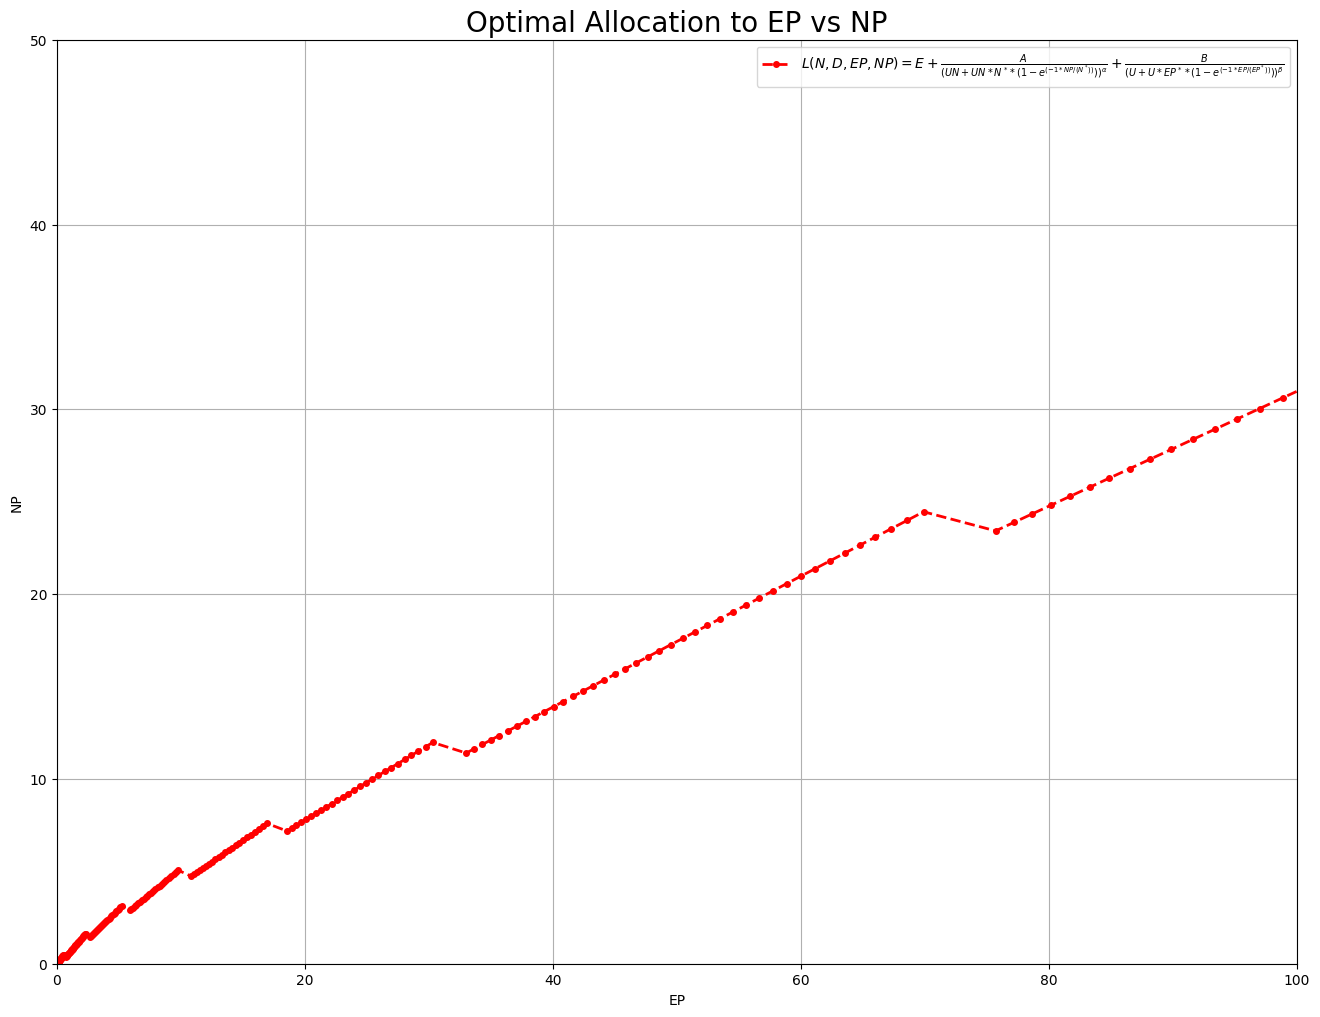

In [ ]:

fig, ax = plt.subplots(figsize=(16, 12))


params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]

def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)

    ### No Log ###
    EP = np.maximum((D / U) - 1, 0)    
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    NP = np.maximum((N / UN ) - 1, 0)

    ### With Log ###
    #EP = np.log(D / U)
    #UN = np.minimum(N,optimal_N(D_to_C(U)))
    #NP = np.log(N / UN)

    L = E + A/(UN + UN*n_star*(1-np.exp(-1*NP/n_star)))**alpha + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    return L, EP, NP


toks_me = []
size_me = []

last_l = float("inf")

for t, s in zip(toks_c4, size_c4):
    t = 10 ** t
    s = 10 ** s

    if (use_cc_before_wall) and (t < unique_toks):
        toks_me.append(t)
        size_me.append(s)
        continue
  
    (min_l, min_ep, min_np), min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s
      
    for i in np.linspace(1.01, 100, 1000):
        D =  t*i
        U = min(unique_toks, D)
        N = s/i

        new_l, EP, NP = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s, min_ep, min_np = new_l, D, N, EP, NP

        D =  t/i
        U = min(unique_toks, D)
        N = s*i
        
        new_l, EP, NP = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s, min_ep, min_np = new_l, D, N, EP, NP
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_me.append(min_ep)
    size_me.append(min_np)

    last_l = min_l

plt.xlim(0, 100)
plt.ylim(0, 50)

plt.plot(
    toks_me, 
    size_me, 
    label=func, 
    color="red", 
    linestyle="--", 
    linewidth=2.0,
    marker=".",
    markersize=8,
)

#plt.axvline(x=np.log10(unique_toks), color='black', linestyle="--", label='Wall (Tokens are repeated afterwards')

ax.set_xlabel('EP')
ax.set_ylabel('NP')
#ax.set_title('IsoLoss Contours for 100M unique tokens')

plt.legend()
plt.grid()

plt.title("Optimal Allocation to EP vs NP", fontsize=20)


In [ ]:
toks_me[0] / size_me[0]

<ipython-input-62-e63037bc08f1>:1: RuntimeWarning: invalid value encountered in double_scalars
  toks_me[0] / size_me[0]


nan

In [ ]:
toks_me[-1] / size_me[-1]

3.2843958763024466

In [ ]:
toks_me[-2] / size_me[-2]

3.2833694414297914

In [ ]:
toks_me[-3] / size_me[-3]

3.2823480843394437

In [ ]:
toks_me[-100] / size_me[-100]

3.2302148376328486

In [ ]:
unique_toks = 100e6

t = 200e6
s = optimal_N(D_to_C(t))


min_l, min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s

for i in np.linspace(1.01, 100, 1000):
    D =  t*i
    U = min(unique_toks, D)
    N = s/i

    new_l = scaling_law(N, D, U, params)
    if new_l < min_l:
        min_l, min_t, min_s = new_l, D, N

    D =  t/i
    U = min(unique_toks, D)
    N = s*i
    
    new_l = scaling_law(N, D, U, params)
    if new_l < min_l:
        min_l, min_t, min_s = new_l, D, N

print(min_t, min_s)

221817817.8178178 9676143.5893401


In [ ]:
optimal_N(D_to_C(unique_toks))

5443526.302827484

In [ ]:
params

[6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]

In [ ]:
min_t

221817817.8178178

In [ ]:
unique_toks

100000000.0

In [ ]:
NP = (min_s / optimal_N(D_to_C(unique_toks))) - 1
EP = (min_t / unique_toks) - 1





In [ ]:
EP, NP

(1.218178178178178, 0.7775506263860807)

In [ ]:
4.9642363 * (1 - np.exp(-1 * 0.7775506263860807 / 4.9642363))

0.7197151644449488

In [ ]:
16.257626 * (1 - np.exp(-1 * 1.218178178178178 / 16.257626))

1.1736582111491594

Text(0, 0.5, 'Loss')

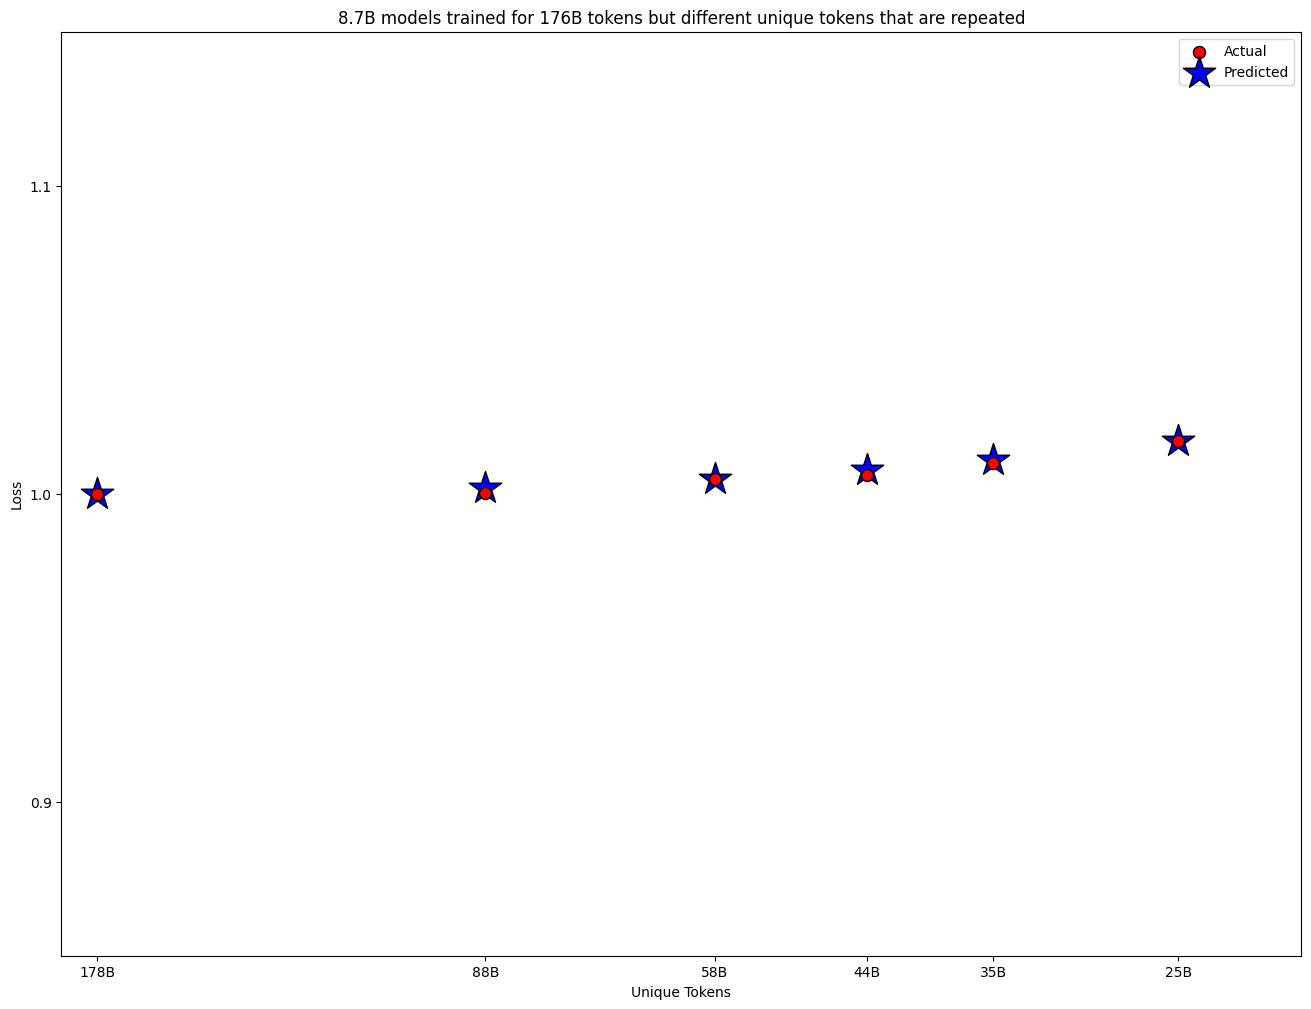

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

TOKS = 178e9
PARAMS = 8.7e9

FIN_LOSSES_DIC = {
    "8b7178b25b": 2.376484E+00,
    "8b7178b35b": 2.360029E+00,
    "8b7178b44b": 2.351177E+00,
    "8b7178b58b": 2.348107E+00,
    "8b7178b88b": 2.337275E+00,
    "8b7178b178b": 2.336741E+00,
}

FIN_LOSSES = list(FIN_LOSSES_DIC.values())[::-1]
REL_LOSSES = [l/FIN_LOSSES[0] for l in FIN_LOSSES]

ut_us = [178e9, 88e9, 58e9, 44e9, 35e9, 25e9]
ut_str = ["178B", "88B", "58B", "44B", "35B", "25B"]

plt.figure(figsize=(16, 12))

OVERLAY = True

if OVERLAY:
    plt.scatter(
        [np.log10(ut_us)], REL_LOSSES, s=300, marker='.', color="red", edgecolor="black", label="Actual", zorder=12
    )
else:
    plt.scatter(
      [np.log10(ut_us)], [np.log10(FIN_LOSSES)], s=600, marker='*', color="red", edgecolor="black", label="Actual", zorder=10
  )

BASE_LOSS = scaling_law(PARAMS, TOKS, TOKS, params)

if OVERLAY:
    plt.scatter(
        [np.log10(ut_us)], [scaling_law(PARAMS, TOKS, ut, params)/BASE_LOSS for ut in ut_us], s=600, marker='*', color="blue", edgecolor="black", label="Predicted", zorder=10
    )
else:
    plt.scatter(
      [np.log10(ut_us)], [np.log10([scaling_law(PARAMS, TOKS, ut, params) for ut in ut_us])], s=600, marker='*', color="blue", edgecolor="black", label="Predicted", zorder=10
    )


x_ticks = ut_us
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, ut_str)
plt.xlim(np.log10(190e9), np.log10(20e9))


if OVERLAY:
    y_ticks = [0.5, 0.75, 0.9, 1.0, 1.1, 1.25, 1.5]
    plt.yticks(y_ticks, y_ticks)
    plt.ylim(0.85, 1.15)
else:
    y_ticks = [1.5, 2, 2.5, 3]
    y_ticks_loc = [np.log10(x) for x in y_ticks]
    plt.yticks(y_ticks_loc, y_ticks)
    plt.ylim(np.log10(1.5), np.log10(3))

plt.legend()
plt.title("8.7B models trained for 176B tokens but different unique tokens that are repeated")
plt.xlabel("Unique Tokens")
plt.ylabel("Loss")

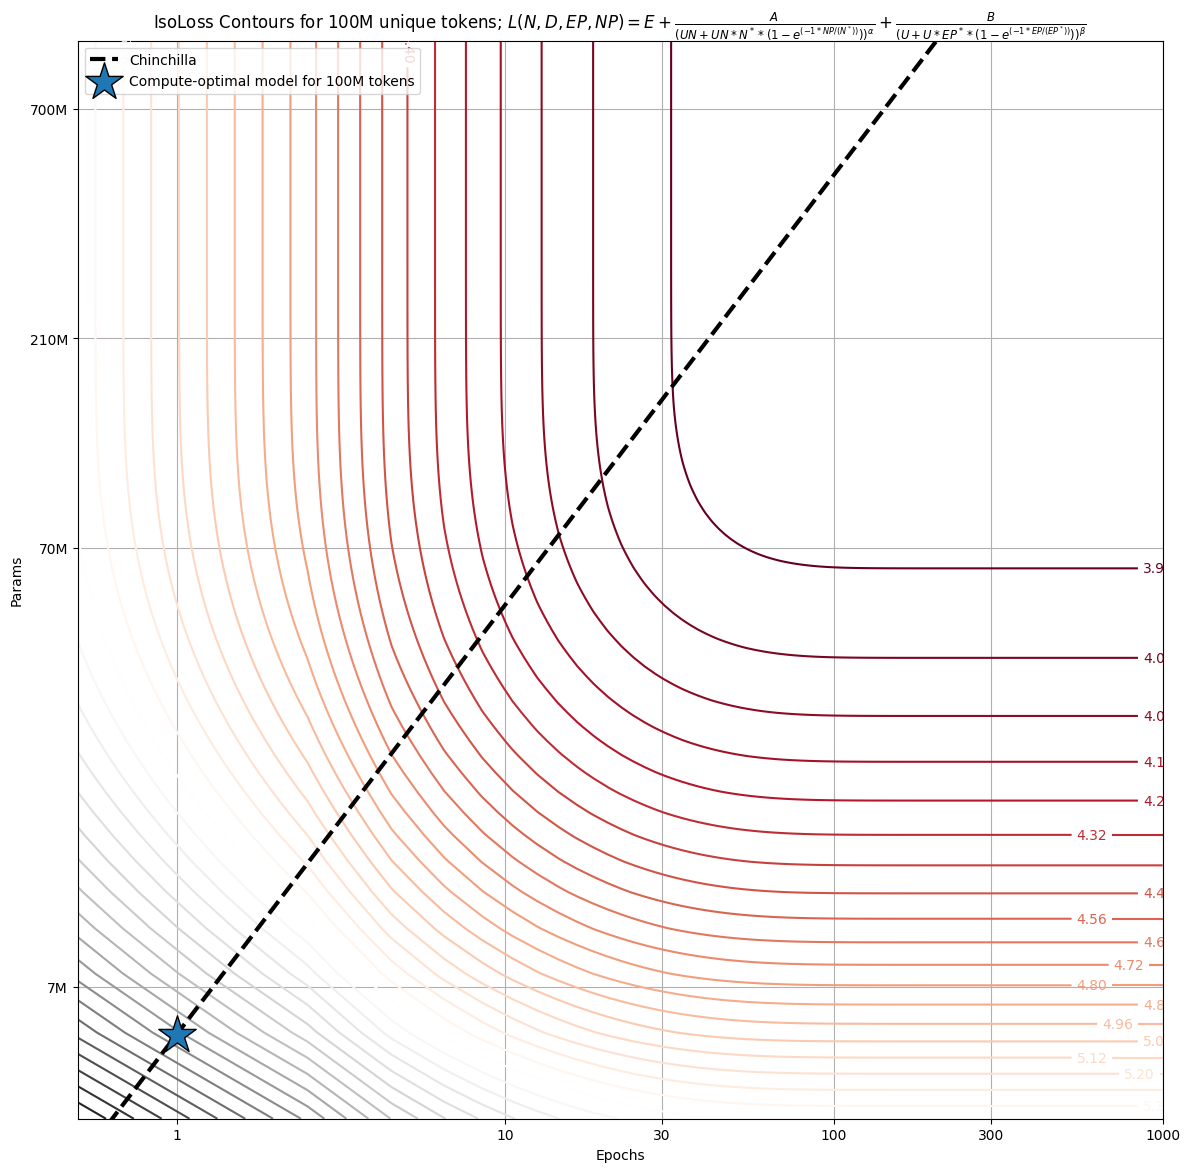

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d = 100e6
es = np.linspace(0.5, 1000, 500)
ps = np.linspace(3.5e6, 10e8, 500)

X, Y = np.meshgrid(es, ps)
opt_n = optimal_N(D_to_C(d))

Z = scaling_law(
    Y, X*d, d, params
)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 14))

x_ticks = [1, 10, 30, 100, 300, 1000, 10000]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, x_ticks)

y_ticks = [1, 10, 30, 100, 300, 1000, 10000]
y_ticks_str = [str(round(x*7)) + "M" for x in y_ticks]
y_ticks = [x*7e6 for x in y_ticks]
y_ticks_loc = [np.log10(x) for x in y_ticks]
plt.yticks(y_ticks_loc, y_ticks_str)

contours = plt.contour(
    np.log10(X), 
    np.log10(Y),
    Z,
    levels=50, 
    cmap='RdGy', 
    extend='both',
)

plt.clabel(contours, levels=contours.levels[:20], inline=True, fontsize=10, fmt='%1.2f')


MIN_PARAMS, MAX_PARAMS = 3.5e6, 7000e6
MIN_TOKS, MAX_TOKS = 50e6, 100e6*1000

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 100)
toks_c4 = np.log10(np.array([optimal_D(x)/d for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x) for x in c_c4]))

xl = ax.get_xlim()
yl = ax.get_ylim()

plt.plot(toks_c4, size_c4, label=r"Chinchilla", color="black", linestyle="--", linewidth=3.0)

plt.xlim(xl)
plt.ylim(yl)

p_c = optimal_N(D_to_C(d))
plt.scatter([np.log10(1)], [np.log10(p_c)], s=800, marker='*', edgecolor="black", label="Compute-optimal model for 100M tokens", zorder=10)


# Add labels and a title to the plot
ax.set_xlabel('Epochs')
ax.set_ylabel('Params')
ax.set_title('IsoLoss Contours for 100M unique tokens; ' + func)
plt.legend()

plt.grid()
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

d = 100e6
es = np.linspace(0.5, 1000, 500)
ps = np.linspace(3.5e6, 10e8, 500)

X, Y = np.meshgrid(es, ps)
opt_n = optimal_N(D_to_C(d))

Z = scaling_law(
    Y, X*d, d, params
)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 14))

x_ticks = [1, 10, 30, 100, 300, 1000, 10000]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, x_ticks)

y_ticks = [1, 10, 30, 100, 300, 1000, 10000]
y_ticks_str = [str(round(x*7)) + "M" for x in y_ticks]
y_ticks = [x*7e6 for x in y_ticks]
y_ticks_loc = [np.log10(x) for x in y_ticks]
plt.yticks(y_ticks_loc, y_ticks_str)

contours = plt.contour(
    np.log10(X), 
    np.log10(Y),
    Z,
    levels=50, 
    cmap='RdGy', 
    extend='both',
)

plt.clabel(contours, levels=contours.levels[:20], inline=True, fontsize=10, fmt='%1.2f')


MIN_PARAMS, MAX_PARAMS = 3.5e6, 7000e6
MIN_TOKS, MAX_TOKS = 50e6, 100e6*1000

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 100)
toks_c4 = np.log10(np.array([optimal_D(x)/d for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x) for x in c_c4]))

xl = ax.get_xlim()
yl = ax.get_ylim()

plt.plot(toks_c4, size_c4, label=r"Chinchilla", color="black", linestyle="--", linewidth=3.0)

plt.xlim(xl)
plt.ylim(yl)

p_c = optimal_N(D_to_C(d))
plt.scatter([np.log10(1)], [np.log10(p_c)], s=800, marker='*', edgecolor="black", label="Compute-optimal model for 100M tokens", zorder=10)


# Add labels and a title to the plot
ax.set_xlabel('Epochs')
ax.set_ylabel('Params')
ax.set_title('IsoLoss Contours for 100M unique tokens; ' + func)
plt.legend()

plt.grid()
plt.show()




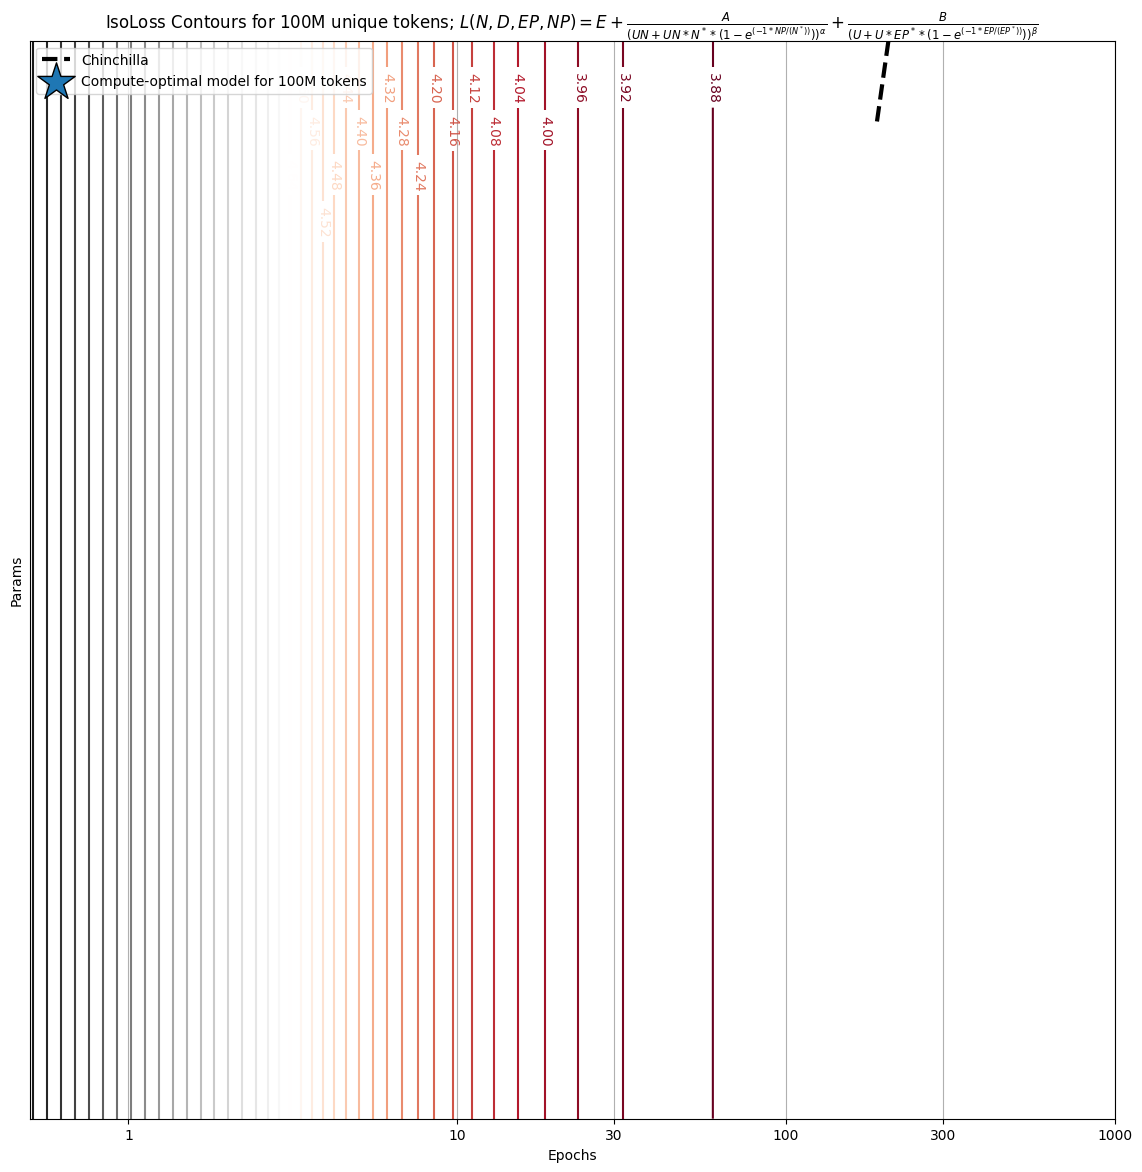

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d = 100e6
es = np.linspace(0.5, 1000, 500)
ps = np.linspace(3.5e8, 10e8, 500)

X, Y = np.meshgrid(es, ps)
opt_n = optimal_N(D_to_C(d))

Z = scaling_law(
    Y, X*d, d, params
)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 14))

x_ticks = [1, 10, 30, 100, 300, 1000, 10000]
x_ticks_loc = [np.log10(x) for x in x_ticks]
plt.xticks(x_ticks_loc, x_ticks)

y_ticks = [1, 10, 30, 100, 300, 1000, 10000]
y_ticks_str = [str(round(x*7)) + "M" for x in y_ticks]
y_ticks = [x*7e9 for x in y_ticks]
y_ticks_loc = [np.log10(x) for x in y_ticks]
plt.yticks(y_ticks_loc, y_ticks_str)

contours = plt.contour(
    np.log10(X), 
    np.log10(Y),
    Z,
    levels=50, 
    cmap='RdGy', 
    extend='both',
)

plt.clabel(contours, levels=contours.levels[:20], inline=True, fontsize=10, fmt='%1.2f')


MIN_PARAMS, MAX_PARAMS = 3.5e8, 7000e6
MIN_TOKS, MAX_TOKS = 50e9, 100e6*1000

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 100)
toks_c4 = np.log10(np.array([optimal_D(x)/d for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x) for x in c_c4]))

xl = ax.get_xlim()
yl = ax.get_ylim()

plt.plot(toks_c4, size_c4, label=r"Chinchilla", color="black", linestyle="--", linewidth=3.0)

plt.xlim(xl)
plt.ylim(yl)

p_c = optimal_N(D_to_C(d))
plt.scatter([np.log10(1)], [np.log10(p_c)], s=800, marker='*', edgecolor="black", label="Compute-optimal model for 100M tokens", zorder=10)


# Add labels and a title to the plot
ax.set_xlabel('Epochs')
ax.set_ylabel('Params')
ax.set_title('IsoLoss Contours for 100M unique tokens; ' + func)
plt.legend()

plt.grid()
plt.show()

In [ ]:
unique_toks = 17e9
#unique_toks = 12e9
#unique_toks = 6e9
params = 4.2465E+09
total_toks = 84e9

"""
unique_toks = 9e9
#unique_toks = 4e9
params = 2.81E+09
total_toks = 55e9
"""
"""
unique_toks = 25e9
#unique_toks = 13e9
params = 8.67E+09
total_toks = 178e9
"""

flops = 6 * params * total_toks
s = opt_n = optimal_N(flops)
t = opt_d = optimal_D(flops)

#fig, ax = plt.subplots(figsize=(16, 12))

params = [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]

def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, ep_star, n_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)

    ### No Log ###
    EP = np.maximum((D / U) - 1, 0)    
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    NP = np.maximum((N / UN ) - 1, 0)

    ### With Log ###
    #EP = np.log(D / U)
    #UN = np.minimum(N,optimal_N(D_to_C(U)))
    #NP = np.log(N / UN)

    L = E + A/(UN + UN*n_star*(1-np.exp(-1*NP/n_star)))**alpha + B / (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))**beta
    
    nterm = (UN + UN*n_star*(1-np.exp(-1*NP/n_star)))
    dterm = (U + U * ep_star * (1 - np.exp(-1*EP/(ep_star))))
    
    return L, EP, NP, dterm, nterm

(min_l, min_ep, min_np, min_dterm, min_nterm), min_t, min_s = scaling_law(s, t, min(unique_toks, t), params), t, s

print("Chinchilla Toks, Size, Flops, Loss: ", t, s, flops, min_l)

for i in np.linspace(1.01, 100, 10000):
    D =  t*i
    U = min(unique_toks, D)
    N = s/i

    new_l, EP, NP, dterm, nterm = scaling_law(N, D, U, params)
    if new_l < min_l:
        min_l, min_t, min_s, min_ep, min_np, min_dterm, min_nterm = new_l, D, N, EP, NP, dterm, nterm

    D =  t/i
    U = min(unique_toks, D)
    N = s*i

    new_l, EP, NP, dterm, nterm = scaling_law(N, D, U, params)
    if new_l < min_l:
        min_l, min_t, min_s, min_ep, min_np, min_dterm, min_nterm = new_l, D, N, EP, NP, dterm, nterm

print("Us Toks, Size, Eps, Flops, Loss: ", min_t, min_s, min_ep, 6 * min_t * min_s, min_l)

Chinchilla Toks, Size, Flops, Loss:  86832135604.17642 4107995242.9828887 2.140236e+21 2.258631324061751
Us Toks, Size, Eps, Flops, Loss:  109191388812.04694 3266796071.382572 5.423022871296879 2.1402360000000111e+21 2.2567993446947763


In [ ]:
6 * 56905885450.378746 * 2715887799.246469

9.273000000000047e+20

In [ ]:
83953226056.50276 / 2048

40992786.16040174

In [ ]:
### 2.8B model ###

print("2.8B model")

### Chinchilla ###
# CC Pred: 56905885450.378746 2715887799.246469 9.273e+20 2.417646382221343
# Chosen:
print("CC FLOPs: ", 6 * 55000000000 * 2980e6)

### Opt 4B toks ###

print("-"*10)
print("2b855b4b")

print("CC Pred: ", scaling_law(2980e6, 55000000000, 4e9, params))

# Chosen V1:
print("Optv1 FLOPs: ", 6 * 83953225728 * 1794e6)
print("Optv1 Pred: ", scaling_law(1794e6, 83953225728, 4e9, params))


# Opt Pred: 83953226056.50276 1840906028.983145 19.98830651412569 9.273000000000048e+20 2.4101779969560444
# Chosen:
print("Optv2 FLOPs: ", 6 * 74300000000 * 2283e6)
print("Optv2 Pred: ", scaling_law(2283e6, 74300000000, 4e9, params))



print("Optv3 FLOPs: ", 6 * 82500000000 * 2007e6)
print("Optv3 Pred: ", scaling_law(2007e6, 82500000000, 4e9, params))




### Opt 9B toks ###

print("-"*10)
print("2b855b9b")

print("CC Pred: ", scaling_law(2980e6, 55000000000, 9e9, params))

# Chosen V1:
print("Optv1 FLOPs: ", 6 * 73812606976 * 2007e6)
print("Optv1 Pred: ", scaling_law(2007e6, 73812606976, 9e9, params))

# Opt Pred: 73812607513.32906 2093815747.832675 7.20140083481434 9.273000000000048e+20 2.339141621454253
# Chosen: 
print("Opt FLOPs: ", 6 * 73812607513 * 2298e6)
print("Opt Pred: ", scaling_law(2298e6, 73812607513, 9e9, params))


### 4.2B model ###

print("-"*10)
print("-"*10)
print("4.2B model")

### Chinchilla ###

# CC Pred: 86832135604.17642 4107995242.9828887 2.140236e+21 2.3355714791795372
# Chosen:
print("CC FLOPs: ", 6 * 84_000_000_000 * 4516e6)

### Opt 6B toks ###

print("-"*10)
print("4b284b6b")

print("CC Pred: ", scaling_law(4516e6, 84_000_000_000, 9e9, params))

# Chosen V1:
print("Optv1 FLOPs: ", 6 * 128103409664 * 2639e6)
print("Optv1 Pred: ", scaling_law(2639e6, 128103409664, 9e9, params))

# Opt Pred: 128103408841.65623 2784516065.773961 20.35056814027604 2.1402360000000111e+21 2.329082705254264
# Chosen:
print("Optv2 FLOPs: ", 6 * 128000000000 * 2980e6)
print("Optv2 FLOPs: ", scaling_law(2980e6, 128000000000, 9e9, params))

#print("Optv3 FLOPs: ", 6 * 128000000000 * 2980e6)
#print("Optv3 FLOPs: ", scaling_law(2980e6, 128000000000, 9e9, params))



### Opt 12B toks ###

print("-"*10)
print("4b284b12b")

print("CC Pred: ", scaling_law(4516e6, 84_000_000_000, 12e9, params))

# Chosen V1:
print("Optv1 FLOPs: ", 6 * 115208849408 * 2980e6)
print("Optv1 Pred: ", scaling_law(2980e6, 115208849408, 12e9, params))

# Chosen V2 (Not trained due to bad shape)
# print("Opt FLOPs: ", 6 * 110_000_000_000 * 3530e6)
# print("Opt Pred: ", scaling_law(3530e6, 110_000_000_000, 12e9, params))

# Opt Pred: 115208849730.55898 3096168400.5546155 8.60073747754658 2.1402360000000111e+21 2.2735288120226533
# Chosen:
print("Optv2 FLOPs: ", 6 * 100_000_000_000 * 3802e6)
print("Optv2 Pred: ", scaling_law(3802e6, 100_000_000_000, 12e9, params))


print("Optv3 FLOPs: ", 6 * 115_000_000_000 * 3300e6)
print("Optv3 Pred: ", scaling_law(3300e6, 115_000_000_000, 12e9, params))



### Opt 17B toks ###


print("-"*10)
print("4b284b17b")
print("CC Pred: ", scaling_law(4516e6, 84_000_000_000, 17e9, params))

# Opt Pred: 09191388812.04694 3266796071.382572 5.423022871296879 2.1402360000000111e+21 2.2567993446947763
# Chosen:
print("Opt FLOPs: ", 6 * 100_000_000_000 * 3802e6)
print("Opt Pred: ", scaling_law(3802e6, 104_000_000_000, 17e9, params))



### 8.7B model ###

print("-"*10)
print("-"*10)
print("8.7B model")

# CC Pred: 182002249305.46555 8479345754.732185 9.25956e+21 2.171099130093615
# Chosen:
print("CC FLOPs: ", 6 * 177999998976 * 9293e6)

### Opt 25B toks ###

print("-"*10)
print("8b7178b25b")

print("CC Pred: ", scaling_law(9293e6, 177999998976, 25e9, params))

# Opt Pred: 241480526131.94727 6390825896.895537 8.65922104527789 9.259560000000049e+21 2.1687654267110643
# Chosen:
print("Opt FLOPs: ", 6 * 241480525824 * 6796e6)
print("Opt Pred: ", scaling_law(6796e6, 241480525824, 25e9, params))

2.8B model
CC FLOPs:  9.834e+20
----------
2b855b4b
CC Pred:  2.4177727688469903
Optv1 FLOPs:  9.03672521736192e+20
Optv1 Pred:  2.411337013055265
Optv2 FLOPs:  1.0177614e+21
Optv2 Pred:  2.4077113931136576
Optv3 FLOPs:  9.93465e+20
Optv3 Pred:  2.4073588786214586
----------
2b855b9b
CC Pred:  2.3400430727660724
Optv1 FLOPs:  8.88851413204992e+20
Optv1 Pred:  2.3419241911334
Opt FLOPs:  1.017728232389244e+21
Opt Pred:  2.333349580484288
----------
----------
4.2B model
CC FLOPs:  2.276064e+21
----------
4b284b6b
CC Pred:  2.2957823363193643
Optv1 FLOPs:  2.028389388619776e+21
Optv1 Pred:  2.2952663529210025
Optv2 FLOPs:  2.28864e+21
Optv2 FLOPs:  2.2892187313890084
----------
4b284b12b
CC Pred:  2.27497198725605
Optv1 FLOPs:  2.05993422741504e+21
Optv1 Pred:  2.275595676504512
Optv2 FLOPs:  2.2812e+21
Optv2 Pred:  2.2713833173370195
Optv3 FLOPs:  2.277e+21
Optv3 Pred:  2.2703260207415554
----------
4b284b17b
CC Pred:  2.2563411735146897
Opt FLOPs:  2.2812e+21
Opt Pred:  2.2512646458880

In [ ]:
3530 / 34

103.82352941176471

In [ ]:
115_000_000_000 / 2048

56152343.75

In [ ]:
117_910_413 * 2048

241480525824

In [ ]:
86914062 * 2048

177999998976

In [ ]:
73812607513 / 2048

36041312.26220703

In [ ]:
36_041_312 * 2048

73812606976

In [ ]:
### Opt ###

print(6 * 83953226056.50276 * 1840906028.983145)
print(6 * 83953226056.50276 * 2007e6)
print(6 * 84000000000 * 2007e6)

print(6 * 74300000000 * 2283e6)
print(74300000000 / 2048)


9.273000000000048e+20
1.0109647481724063e+21
1.011528e+21
1.0177614e+21
36279296.875


In [ ]:
6 * 83953226056.50276 * 2283e6

1.1499912905219749e+21

In [ ]:
36_041_312 * 2048

73812606976

In [ ]:
min_l, min_t, min_s, min_ep, 6 * min_t * min_s

(2.4101779969560444,
 83953226056.50276,
 1840906028.983145,
 19.98830651412569,
 9.273000000000048e+20)

In [ ]:
115208849730.55898 / 2048

56254321.1574995

In [ ]:
128103408841.65623 / 2048

62550492.59846496

In [ ]:
73812607513.32906 / 2048

36041312.2623677

In [ ]:
83953226056.50276 / 2048

40992786.16040174

In [ ]:
241480526131.94727 / 2048

117910413.15036488